In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import pandas as pd
import cmath as cm

In [27]:
#Parameters
freq=170e3;
fs1=100e3;
fs2=100e3;
fs3=100e3;
fs4=100e3;
Amp1=1;
Amp2=1;
Amp3=1;
Amp4=1;
phase=0.99*np.pi/2;                           #0<phase<pi/2 
noise_power=1e-12*fs1/2

In [28]:
#interleaving signal with two ADC
N=1000;    #PERIODES NUMBER
t1=np.arange(0,N/freq,1/fs1)
t2=np.arange((1/(2*fs1))*phase/np.pi,(1/(2*fs1))*phase/np.pi+N/freq,1/fs2)
t3=np.arange((2/(2*fs1))*phase/np.pi,(1/(2*fs1))*phase/np.pi+N/freq,1/fs3)
t4=np.arange((3/(2*fs1))*phase/np.pi,(1/(2*fs1))*phase/np.pi+N/freq,1/fs4)
te=np.arange(0,N/freq,1/(4*fs1))

#signal sampling
s1=Amp1*np.sin(2*np.pi*t1*freq)#+Amp1*np.sin(2*2*np.pi*t1*freq);
s2=Amp2*np.sin(2*np.pi*t2*freq)#+Amp2*np.sin(2*2*np.pi*t2*freq);
s3=Amp3*np.sin(2*np.pi*t3*freq)#+Amp3*np.sin(2*2*np.pi*t4*freq);
s4=Amp4*np.sin(2*np.pi*t4*freq)#+Amp4*np.sin(2*2*np.pi*t3*freq);
st=np.empty((s1.size + s2.size + s3.size + s4.size,), dtype=s1.dtype)
st[0::4] = s1
st[1::4] = s2
st[2::4] = s3
st[3::4] = s4
st+=np.random.normal(scale=np.sqrt(noise_power), size=st.shape)
st=st[0:len(te)]

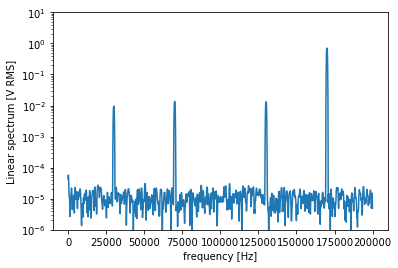

In [29]:
f, Pxx_spec = signal.periodogram(st, 4*fs1, 'flattop', scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.ylim([1e-6, 1e1])
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()

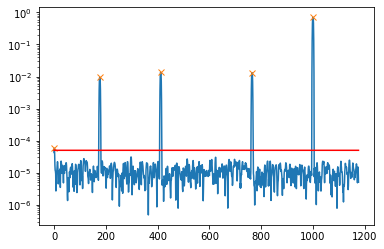

54.307957855465084


In [30]:
d=np.sqrt(Pxx_spec);
peaks, _=signal.find_peaks(d, height=0.5e-4)
plt.semilogy(d)
plt.semilogy(peaks,d[peaks], "x")
plt.semilogy(0.5e-4*np.ones_like(d),'r')
plt.show()
print(10*np.log(d[peaks][3]/d[peaks][0]))

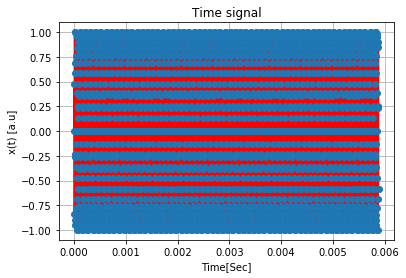

In [32]:
#Ploting signal
fig, ax = plt.subplots()
ax.plot(te,st,'r',te,st,'o') #Single period

ax.set(xlabel='Time[Sec]', ylabel='x(t) [a.u]',
       title='Time signal')
ax.grid()

fig.savefig("Time_domanin_Signal.pdf")
plt.show()